JupyNext should be powerful enough to achieve most technical and creative writing goals. In this page are some features that this supports.

Note, there is a deeper dive into the features in the [feature test article](/feature-test/feature-test)

## Writing

Write your content as [markdown](https://www.markdownguide.org/getting-started/) or HTML (or a combination of both)!

To write `markdown` or HTML, add cells to your Jupyter notebooks with the cell type `Markdown`.

## Code

JupyNext not only supports markdown code blocks, but also Jupyter notebook code cells.

**Usage:**
* The language will be inferred from cell metadata (choose your kernel correctly)
* The build step does **not** run this code
* Outputs will be rendered

**Gotchas:**
* Due to weird behavior in Jupyter notebooks, `stdin` and `stdout` are often not  in order
* Rich output renderers have not been thoroughly tested. Raise an issue if you are facing an issue.
    * Currently tested: image outputs (matplotlib, similar) and tables (pandas)
* Basic outputs are rendered using `ascii-to-html` and escaped. HTML rich outputs are not escaped or sanitized.

In [2]:
import sys

# example code, simple
print('hello, world!') # stdout
print('error world!', file=sys.stderr) # stderr
print('hello, world!') # stdout
print(x + y) # error

hello, world!
hello, world!


error world!


NameError: name 'x' is not defined

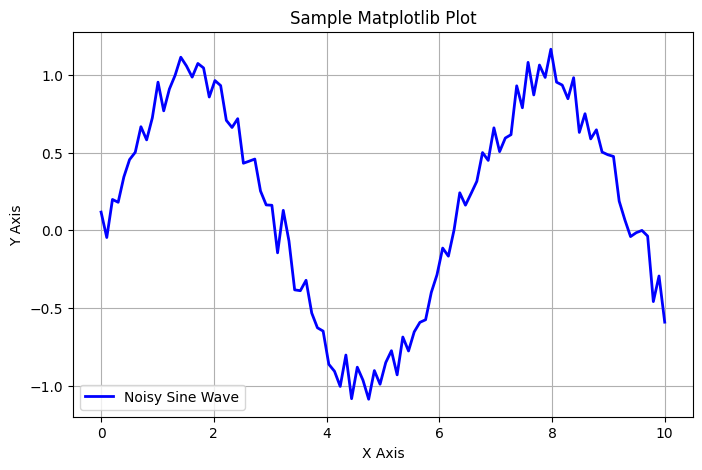

,A,B,C
0,80,0.222633,No
1,53,0.426026,No
2,91,0.558799,No
3,94,0.164255,Yes
4,94,0.620926,Yes
5,32,0.213927,No
6,88,0.689473,Yes
7,68,0.305074,Yes
8,19,0.416991,Yes
9,4,0.708401,Yes


In [4]:
# Some rich outputs (matplotlib and pandas)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate random data for a plot
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(scale=0.1, size=len(x))

plt.figure(figsize=(8, 5))
plt.plot(x, y, label="Noisy Sine Wave", color="blue", linewidth=2)
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.title("Sample Matplotlib Plot")
plt.legend()
plt.grid(True)
plt.show()

# Generate a sample DataFrame
data = {
    "A": np.random.randint(0, 100, 10),
    "B": np.random.rand(10),
    "C": np.random.choice(["Yes", "No"], 10),
}
df = pd.DataFrame(data)

# Display DataFrame
df

## Magic Statements

JupyNext magic statements are different from the ones that Jupyter notebook itself supports.

Create a magic statement with the following syntax:

```
#% {statement}
```

OR

```
//% {statement}
```

Additionally, **magic statements must be the first lines of a cell**. The first line which does not start with `#%` or `//%` indicate that content has started and parsing stops.

## Hide Cells

Sometimes, you might want to write yourself documentation or run some code that does not need to actually be rendered on your website. To achieve that, use a **magic** statement.

Use the magic `hidden` or `delete`.

```
#% hidden
OR
#% delete
```

Note that hidden and delete are currently equivalent. The cells are actually deleted from the rendered copy of the notebook.

## Embeds

JupyNext supports embeds. Embeds will use a Raw cell.

I'm still investigating if there is a better way for me to implement embeds though. Raw cell embeds are hard to read.

Read [feature test, page 4](/feature-test/feature-test/4) to learn more about embeds.

## Attachments

Attachments (such as images) are removed from the notebook, and instead, copied to `/public/assets/attachments/...`.

Currently, only image `src` are resolved to the correct URL. A future, to-be-added, feature will be to update links too.

To attach images, simply drag and drop an image into Jupyter notebook or JupyterLab. Attaching non-images is much more tricky, and I may write a Jupyter extension to make it easier.